"""
Unsharp mask enhances edges by subtracting an unsharp (smoothed) version of the image from the original.

Effectively making the filter a high pass filter. 

enhanced image = original + amount * (original - blurred)

Amount of sharpening can be controlled via scaling factor, a multiplication factor
for the sharpened signal. 

skimage uses Gaussian smoothing for image blurring therefore the radius parameter 
in the unsharp masking filter refers to the sigma parameter of the gaussian filter.

"""

In [2]:
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian
from matplotlib import pyplot as plt
import cv2

#image read

(256, 256)

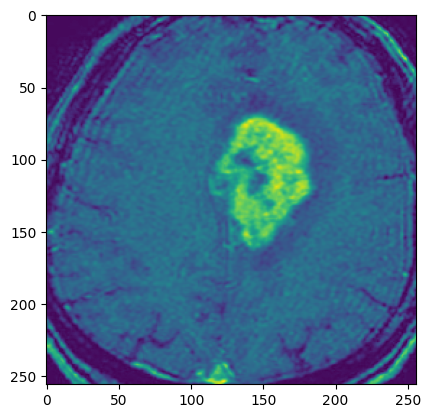

In [34]:
img = img_as_float(io.imread("/Users/diganto/Data/Thesis/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif", as_gray=True))
plt.imshow(img)
img.shape

#gussian image

(256, 256, 3)

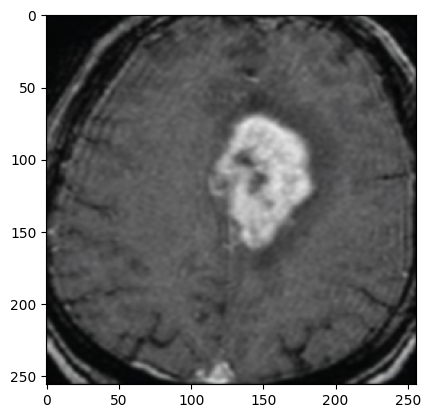

In [10]:
gaussian_img = gaussian(img, sigma=1, mode='constant', cval=0.0)
plt.imshow(gaussian_img)
gaussian_img.shape

#Unsharp mask

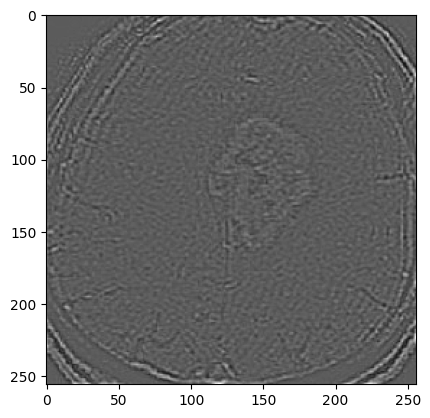

In [4]:
#enhanced image = original + amount * (original - blurred)

img2 = 2*(img - gaussian_img)
img3 = img + img2
plt.imshow(img2, cmap="gray")

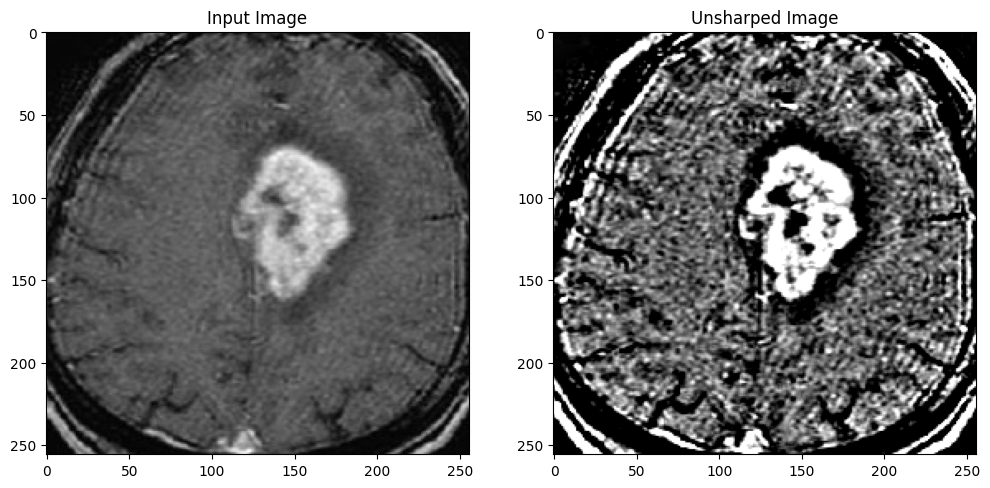

In [5]:
#Radius defines the degree of blurring
#Amount defines the multiplication factor for original - blurred image
unsharped_img = unsharp_mask(img, radius=7, amount=5)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')
plt.show()

#Gaussian denoising for noise reduction

/opt/homebrew/lib/python3.9/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


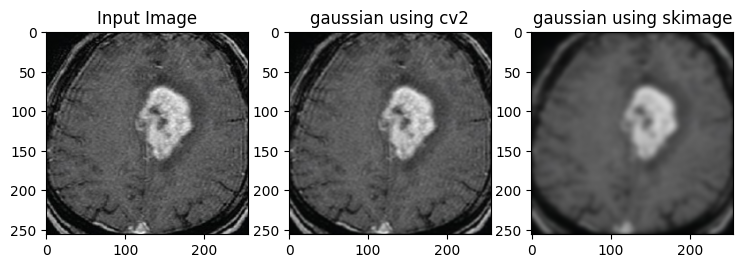

In [9]:
#using ovenCv
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)

#using scikit-image
gaussian_using_skimage = gaussian(img, sigma=3, mode='constant', cval=0.0)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,4,2)
ax2.imshow(gaussian_using_cv2)
ax2.title.set_text('gaussian using cv2')
ax2 = fig.add_subplot(1,4,3)
ax2.imshow(gaussian_using_skimage)
ax2.title.set_text('gaussian using skimage')
plt.show()

In [25]:
from skimage.filters import roberts, sobel, scharr, prewitt, farid
roberts_img = roberts(img)
sobel_img = sobel(img)
scharr_img = scharr(img)
prewitt_img = prewitt(img)
farid_img = farid(img)

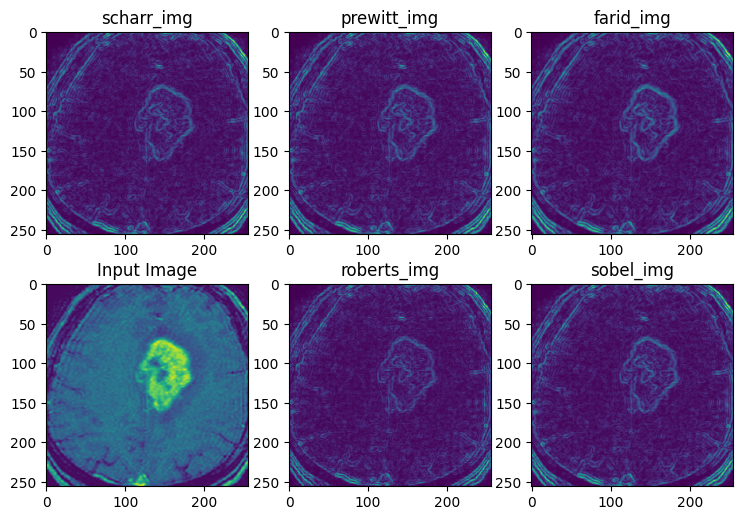

In [26]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,4,2)
ax2.imshow(roberts_img)
ax2.title.set_text('roberts_img')
ax3 = fig.add_subplot(1,4,3)
ax3.imshow(sobel_img)
ax3.title.set_text('sobel_img')
ax3 = fig.add_subplot(2,4,1)
ax3.imshow(scharr_img)
ax3.title.set_text('scharr_img')
ax3 = fig.add_subplot(2,4,2)
ax3.imshow(prewitt_img)
ax3.title.set_text('prewitt_img')
ax3 = fig.add_subplot(2,4,3)
ax3.imshow(farid_img)
ax3.title.set_text('farid_img')
plt.show()

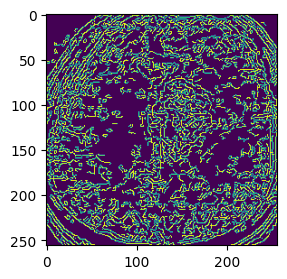

In [7]:
import numpy as np
img = cv2.imread("/Users/diganto/Data/Thesis/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif", 0)
sigma = 0.3
median = np.median(img)

lower = int(max(0, (1.0 - sigma) * median)) 
#Lower threshold is sigma % lower than median
#If the value is below 0 then take 0 as the value

upper = int(min(255, (1.0 + sigma) * median)) 
#Upper threshold is sigma% higher than median
#If the value is larger than 255 then take 255 a the value

auto_canny = cv2.Canny(img, lower, upper)
fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(auto_canny)


In [2]:
img = io.imread("/Users/diganto/Data/Thesis/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif")

In [9]:
x = img.reshape((1, ) + img.shape)  #Array with shape (1, 256, 256, 3)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=125) 
i = 0
for batch in datagen.flow(x,batch_size=16,  
                          save_to_dir='augmented', 
                          save_prefix='aug_with_cval_125', 
                          save_format='png'):
    i += 1
    if i > 20:
        break

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant') 
i = 0
for batch in datagen.flow(x,batch_size=16,  
                          save_to_dir='augmented', 
                          save_prefix='aug_without_cval_125', 
                          save_format='png'):
    i += 1
    if i > 20:
        break

In [15]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 
i = 0
for batch in datagen.flow(x,batch_size=16,  
                          save_to_dir='augmented', 
                          save_prefix='aug_with_nearest', 
                          save_format='png'):
    i += 1
    if i > 20:
        break

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect') 
i = 0
for batch in datagen.flow(x,batch_size=16,  
                          save_to_dir='augmented', 
                          save_prefix='aug_with_reflect', 
                          save_format='png'):
    i += 1
    if i > 20:
        break

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='wrap', cval=125) 
i = 0
for batch in datagen.flow(x,batch_size=16,  
                          save_to_dir='augmented', 
                          save_prefix='aug_with_wrap', 
                          save_format='png'):
    i += 1
    if i > 20:
        break

In [33]:
img.mean(),img.std()

(78.99452209472656, 39.20989347809034)